# ttest after excluding certain pairs of faces

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_results(results_fn, rep_name):
    """
        Function to load the results
            - result_fn: the path to the result folder
            - rep_name: what type of representation to use (e.g, the averaged representations)
    """
    results_dir = '../results/'
    results_path = os.path.join(results_dir,results_fn)
    
    with open(results_path, 'rb') as f:
        data = pickle.load(f)
    
    # Get regression results
    analysis = data['analysis']
    n_runs = len(analysis)
    n_steps = len(analysis[0])
    n_states = analysis[0][0]['get_diag_vis_params'][rep_name]['n_states']
    idx2loc = analysis[0][0]['get_diag_vis_params'][rep_name]['idx2loc']
    results_each = np.zeros([n_runs, n_steps, n_states])
    results_bl_tr = np.zeros([n_runs, n_steps])
    results_corners = np.zeros([n_runs, n_steps])
    for run_i, run in enumerate(analysis):
        for step_i, step in enumerate(run):
            # Results of regression excluding each face one at a time
            for idx in range(n_states):
                each = step['ttest_exclusion']['excluding_each'][rep_name][idx][0]
                results_each[run_i, step_i, idx] = each
            # Results of regression excluding bottom left and top right
            bl_tr = step['ttest_exclusion']['excluding_bl_tr'][rep_name][0]
            results_bl_tr[run_i, step_i] = bl_tr
            # Results of regression excluding all corners
            corners = step['ttest_exclusion']['excluding_corners'][rep_name][0]
            results_corners[run_i, step_i] = corners
    
    # Compute means and standard errors
    each_mean = np.mean(results_each, axis=0)
    each_sem = np.std(results_each, axis=0) / np.sqrt(n_runs)
    bl_tr_mean = np.mean(results_bl_tr, axis=0)
    bl_tr_sem = np.std(results_bl_tr, axis=0) / np.sqrt(n_runs)
    corners_mean = np.mean(results_corners, axis=0)
    corners_sem = np.std(results_corners, axis=0) / np.sqrt(n_runs)
    
    return (each_mean, each_sem), (bl_tr_mean, bl_tr_sem), (corners_mean, corners_sem), idx2loc

In [3]:
def load_results(results_fn, rep_name):
    """
        Function to load the results
            - result_fn: the path to the result folder
            - rep_name: what type of representation to use (e.g, the averaged representations)
    """
    results_dir = '../results/'
    results_path = os.path.join(results_dir,results_fn)
    
    with open(results_path, 'rb') as f:
        data = pickle.load(f)
    
    # Get regression results
    analysis = data['analysis']
    n_runs = len(analysis)
    n_steps = len(analysis[0])
    n_states = analysis[0][0]['get_diag_vis_params'][rep_name]['n_states']
    idx2loc = analysis[0][0]['get_diag_vis_params'][rep_name]['idx2loc']
    results_each = np.zeros([n_runs, n_steps, n_states])
    results_bl_tr = np.zeros([n_runs, n_steps])
    results_corners = np.zeros([n_runs, n_steps])
    for run_i, run in enumerate(analysis):
        for step_i, step in enumerate(run):
            # Results of regression excluding each face one at a time
            for idx in range(n_states):
                each = step['ttest_exclusion']['excluding_each'][rep_name][idx]['t_statistic']
                results_each[run_i, step_i, idx] = each
            # Results of regression excluding bottom left and top right
            bl_tr = step['ttest_exclusion']['excluding_bl_tr'][rep_name]['t_statistic']
            results_bl_tr[run_i, step_i] = bl_tr
            # Results of regression excluding all corners
            corners = step['ttest_exclusion']['excluding_corners'][rep_name]['t_statistic']
            results_corners[run_i, step_i] = corners

    # Compute means and standard errors
    each_mean = np.mean(results_each, axis=0)
    each_sem = np.std(results_each, axis=0) / np.sqrt(n_runs)
    bl_tr_mean = np.mean(results_bl_tr, axis=0)
    bl_tr_sem = np.std(results_bl_tr, axis=0) / np.sqrt(n_runs)
    corners_mean = np.mean(results_corners, axis=0)
    corners_sem = np.std(results_corners, axis=0) / np.sqrt(n_runs)
    
    return (each_mean, each_sem), (bl_tr_mean, bl_tr_sem), (corners_mean, corners_sem), idx2loc

In [4]:
results_fn = 'rnn.P'
rep_name = 'average'
# steps at each we do the analysis (e.g, do the analysis every 50 steps)
analyze_every = 50
results_dir = '../results/'
results_path = os.path.join(results_dir,results_fn)

In [5]:
def plot_each(each_mean, each_sem, idx2loc, title, save_fn):
    """
        Function to plot the results
            - each_mean: mean values
            - each_sem: standard error of mean values
            - idx2loc: conver index to 2D location (e.g, 1 -> (0,1))
            - title: title for the plot
            - save_fn: filename to save the result
    """
    n_steps = len(each_mean)
    x = [i for i in range(n_steps)]
    x_labels = [i*analyze_every for i in range(n_steps)]
    xticks = [4*i for i in range((n_steps // 4) + 1)]
    xtick_labels = [xtick*analyze_every for xtick in xticks]
    
    fig, ax = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(15, 10))
    for idx, loc in idx2loc.items():
        fig_loc = (3 - loc[1], loc[0])
        ax[fig_loc].errorbar(x, each_mean[:,idx], yerr=each_sem[:,idx])
        ax[fig_loc].set_xticks(xticks)
        ax[fig_loc].axhline(y=1.96, color='r', linewidth=2)
        ax[fig_loc].axhline(y=-1.96, color='r', linewidth=2)
        ax[fig_loc].set_title("Excluding (%d, %d)" % loc)
        if fig_loc[0] == 3:
            ax[fig_loc].set_xticklabels(xtick_labels)
            ax[fig_loc].set_xlabel("Steps")
        if fig_loc[1] == 0:
            ax[fig_loc].set_ylabel("T statistic")
        
    fig.suptitle(title, y=0.94)
    
    # Save figure
    if save_fn is not None:
        plt.savefig(save_fn, dpi=300, bbox_inches='tight')
    plt.show()   

In [6]:
def plot_ttest(t_mean, t_sem, title, save_fn):
    """
        Function to plot the ttest results
            - t_mean: mean values 
            - t_sem: standard error of mean values 
            - title: title for the plot
            - save_fn: filename to save the result
    """
    n_steps = len(t_mean)
    x = [i for i in range(n_steps)]
    x_labels = [i*analyze_every for i in range(n_steps)]
    xticks = [2*i for i in range((n_steps // 2) + 1)]
    xtick_labels = [xtick*analyze_every for xtick in xticks]
    
    fig, ax = plt.subplots()
    ax.errorbar(x, t_mean, yerr=t_sem)
    ax.axhline(y=1.96, color='r', linewidth=2)
    ax.axhline(y=-1.96, color='r', linewidth=2)
        
    ax.set_title(title)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels)
    ax.set_xlabel("Steps")
    ax.set_ylabel("T statistic")
    
    # Save figure
    if save_fn is not None:
        plt.savefig(save_fn, dpi=300, format='eps', bbox_inches='tight')
    plt.show()    

In [7]:
results_fn = 'rnn.P'
rep_name = 'average'
# steps at each we do the analysis (e.g, do the analysis every 50 steps)
analyze_every = 50

Load results

In [8]:
each, bl_tr, corners, idx2loc = load_results(results_fn, rep_name)
each_mean, each_sem = each
bl_tr_mean, bl_tr_sem = bl_tr 
corners_mean, corners_sem = corners

Plot the results after excluding each face

In [9]:
title = "RNN: regression excluding each face"
save_fn = '../figures/excluding_each_rnn.eps'

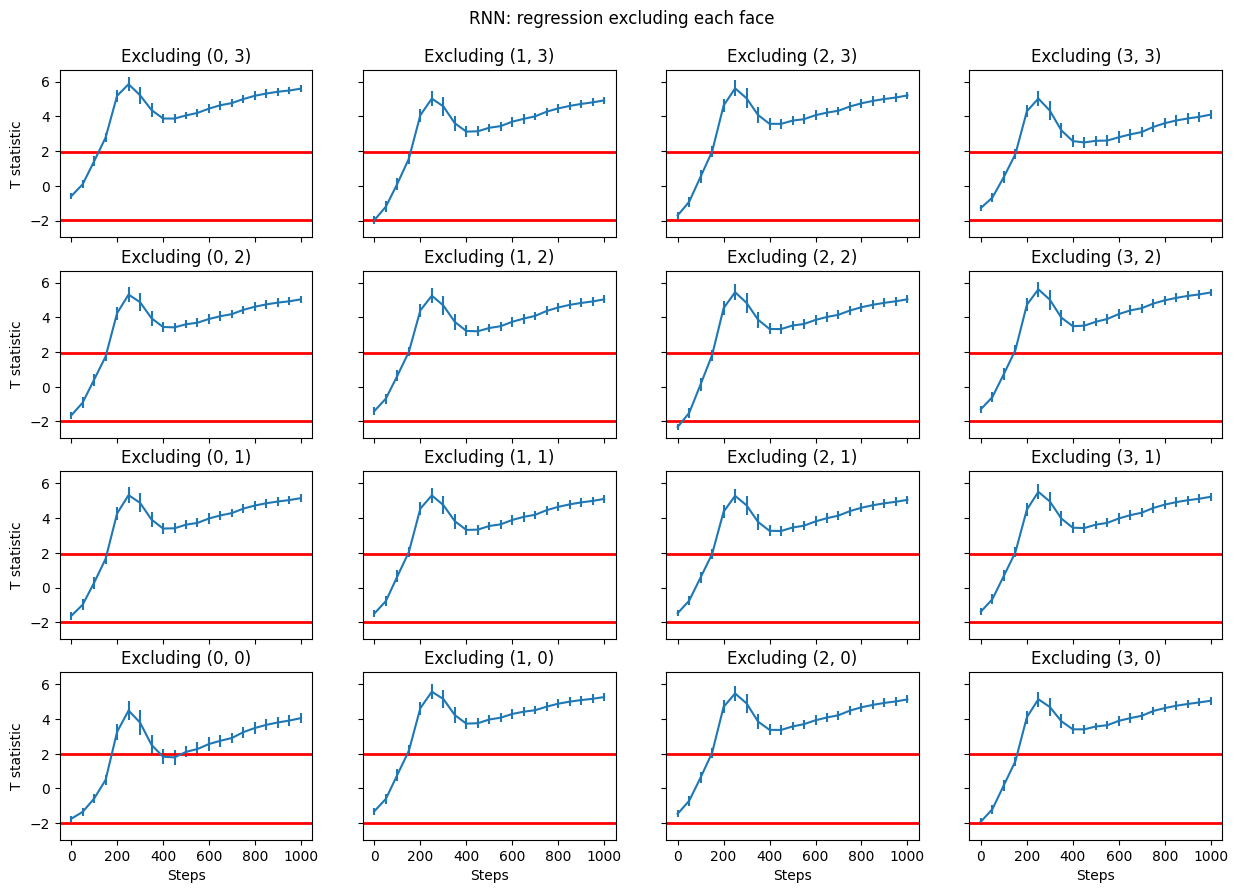

In [10]:
plot_each(each_mean, each_sem, idx2loc, title, save_fn)

Plot results after excluding bottom left and top right

In [11]:
title = "RNN: ttest excluding bottom left and top right"
save_fn = '../figures/excluding_bl_tr_rnn.eps'

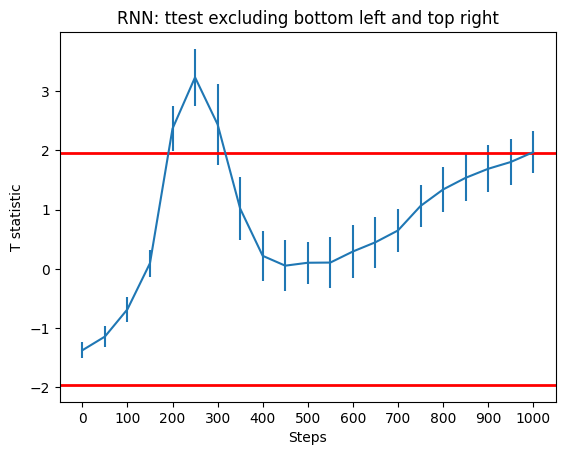

In [12]:
plot_ttest(bl_tr_mean, bl_tr_sem, title, save_fn)

Plot the results after excluding all corners

In [13]:
title = "RNN: regression excluding all corners"
save_fn = '../figures/excluding_corners_rnn.eps'

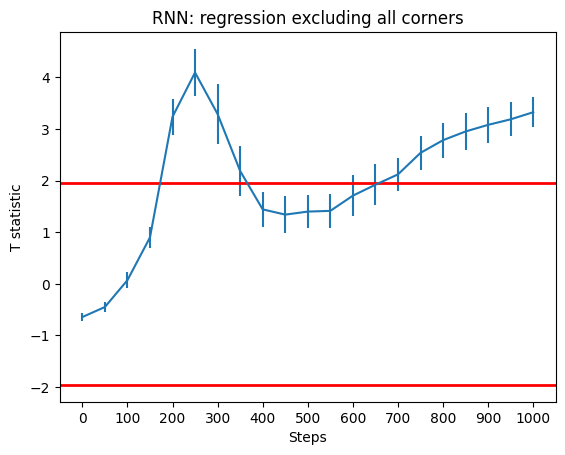

In [14]:
plot_ttest(corners_mean, corners_sem, title, save_fn)